#Um exemplo básico

Este notebook aborda a análise de um conjunto de dados relacionado à **qualidade de vinhos tintos**. O objetivo principal é entender como diferentes características químicas e físicas do vinho influenciam sua qualidade, que é avaliada por especialistas em uma escala de 0 a 10.

### Descrição da Tabela

A tabela contém **11 variáveis preditoras** e **1 variável alvo** (`quality`), descritas a seguir:

| **Coluna**               | **Descrição**                                    |
|--------------------------|--------------------------------------------------|
| `fixed acidity`          | Acidez fixa do vinho (ex.: ácido tartárico).     |
| `volatile acidity`       | Acidez volátil, relacionada ao ácido acético.    |
| `citric acid`            | Presença de ácido cítrico (afeta sabor e aroma). |
| `residual sugar`         | Quantidade de açúcar residual no vinho.          |
| `chlorides`              | Concentração de cloretos (sal).                  |
| `free sulfur dioxide`    | Dióxido de enxofre livre (previne oxidação).     |
| `total sulfur dioxide`   | Total de dióxido de enxofre presente.            |
| `density`                | Densidade do vinho.                              |
| `pH`                     | Indicador de acidez do vinho.                    |
| `sulphates`              | Nível de sulfatos (relacionado à conservação).   |
| `alcohol`                | Teor alcoólico do vinho (% em volume).           |
| `quality`                | Qualidade do vinho, avaliada por especialistas.  |


Abaixo, segue um exemplo de como podemos usar redes neurais para aprender a relação entre as propiedades do vinho e sua qualidade. O modelo treinado sera capaz de prever a qualidade de um vinho, apenas usando essas propiedades.

$
  \text{Qualidade}= \text{model}(\text{Propiedades})
$


In [ ]:
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset com o separador correto
file_path = 'winequality-red.csv'
data = pd.read_csv(file_path, sep=';')
print(data.head())
# Definir características (X) e alvo (y)
X = data.drop(columns=['quality']).values
y = data['quality'].values

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Época 1/500, Perda Treino: 14.3469, Perda Validação: 115.6885
Época 101/500, Perda Treino: 0.5236, Perda Validação: 0.4723
Época 201/500, Perda Treino: 0.5028, Perda Validação: 0.4587
Época 301/500, Perda Treino: 0.5033, Perda Validação: 0.4319
Época 401/500, Perda Treino: 0.4969, Perda Validação: 0.4099


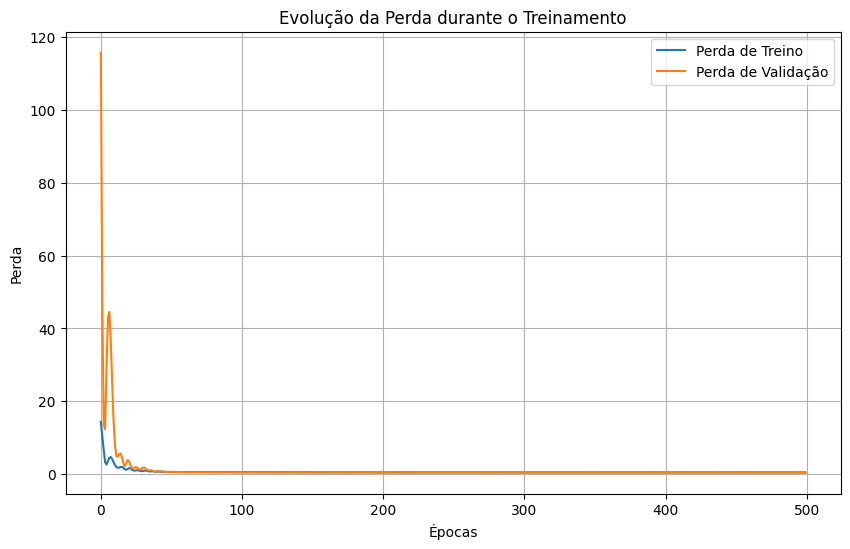

Perda no Conjunto de Teste: 0.4069


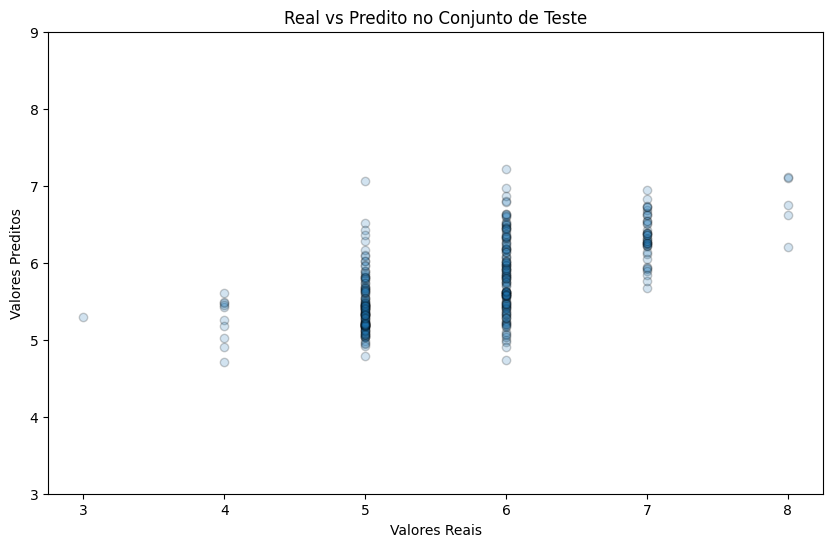

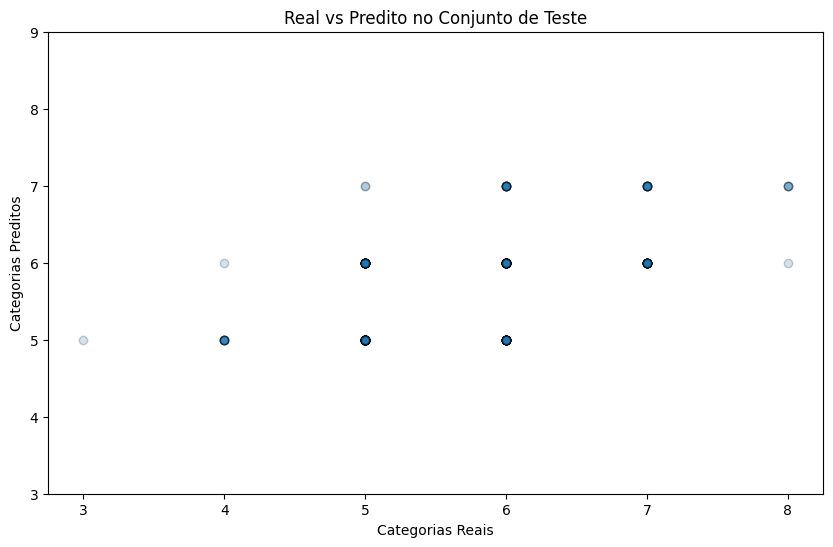

In [ ]:


# Converter os dados para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Formato adequado para MSE
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definir uma rede neural simples
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Saída única para regressão

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# Inicializar o modelo
input_size = X_train.shape[1]
model = SimpleNN(input_size)

# Definir função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinar o modelo com visualização de perda
epochs = 500
train_losses = []
val_losses = []
i=0

for epoch in range(epochs):
    # Modo de treinamento
    model.train()
    outputs = model(X_train_tensor)
    loss = torch.mean(torch.abs(outputs - y_train_tensor))

    # Backprop e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_test_tensor)
        val_loss = criterion(val_predictions, y_test_tensor)
        val_losses.append(val_loss.item())
    if(i%100==0):
      print(f"Época {epoch+1}/{epochs}, Perda Treino: {loss.item():.4f}, Perda Validação: {val_loss.item():.4f}")
    i+=1





# Visualização das perdas de treino e validação
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Perda de Treino')
plt.plot(val_losses, label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Evolução da Perda durante o Treinamento')
plt.legend()
plt.grid()
plt.show()

# Avaliar o modelo no conjunto de teste
model.eval()

with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    test_loss = criterion(predictions, y_test_tensor.squeeze())

    print(f"Perda no Conjunto de Teste: {test_loss.item():.4f}")




# Visualização da validação (valores reais vs. preditos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions.numpy() , alpha=0.2, edgecolor='k')
plt.ylim(3,9)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Real vs Predito no Conjunto de Teste')
plt.show()

predictions=predictions.numpy().round()
# Visualização da validação (valores reais vs. preditos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions , alpha=0.2, edgecolor='k')
plt.ylim(3,9)
plt.xlabel('Categorias Reais')
plt.ylabel('Categorias Preditos')
plt.title('Real vs Predito no Conjunto de Teste')
plt.show()




##Um Desafio: Como visualizar bem os dados e resultados?


###Adicionando Um pouquinho de barulho nos valores inteiros


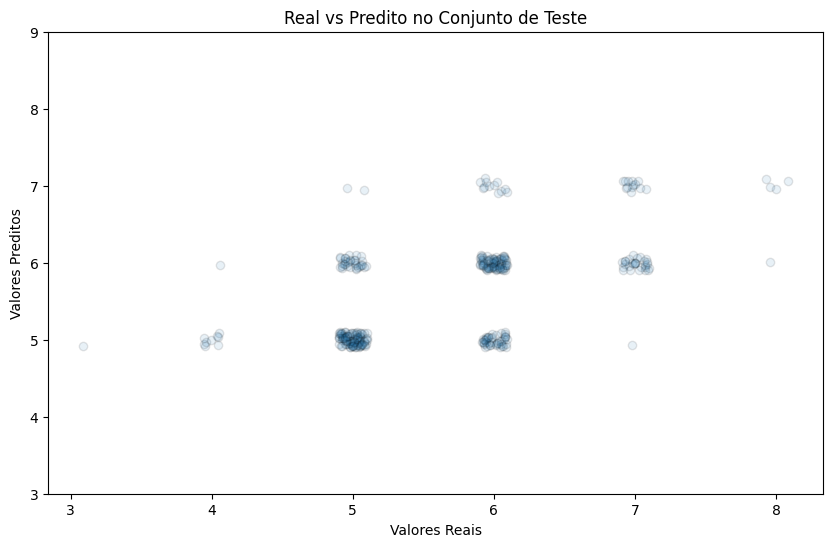

In [ ]:

noise = np.random.uniform(-0.1, 0.1, size=y_test.shape)  # Noise with mean 0 and std 0.5
noise2 = np.random.uniform(-0.1, 0.1, size=y_test.shape)  # Noise with mean 0 and std 0.5



# Visualização da validação (valores reais vs. preditos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test+noise, predictions+noise2, alpha=0.1, edgecolor='k')
plt.ylim(3,9)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Real vs Predito no Conjunto de Teste')
plt.show()


###Histograma de erros por categoria


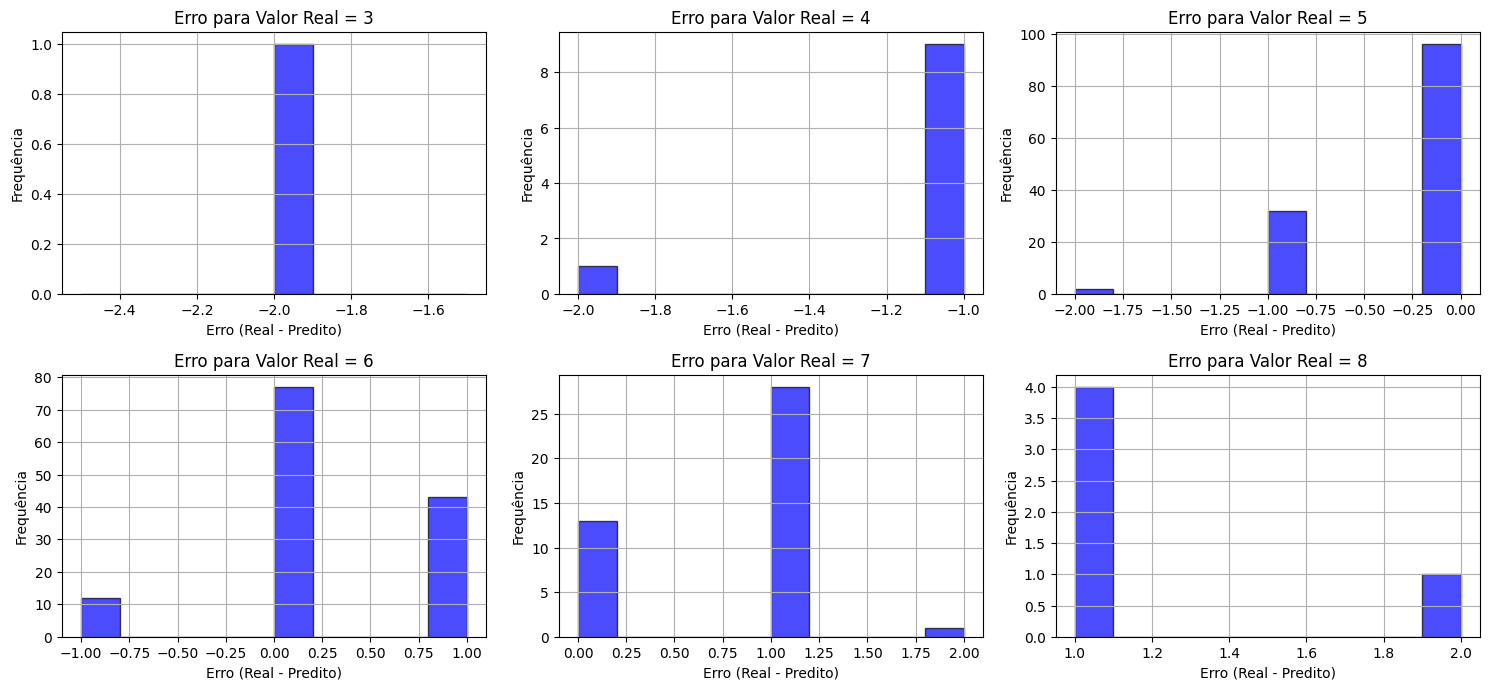

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular os erros (diferença entre valores reais e preditos)
errors = y_test - predictions

# Definir o intervalo de valores para os quais queremos plotar os histogramas
values_range = np.arange(3, 9)  # Intervalo de valores reais [3, 4, ..., 9]

# Criar a figura com múltiplos subgráficos
plt.figure(figsize=(15, 10))
# Loop para plotar um histograma para cada valor de 3 a 9
for i, value in enumerate(values_range):
    # Filtrar os erros para o valor atual
    value_errors = errors[y_test == value]

    # Criar um subgráfico
    plt.subplot(3, 3, i+1)
    plt.hist(value_errors, bins=10, alpha=0.7, edgecolor='black', color='blue')
    plt.title(f'Erro para Valor Real = {value}')
    plt.xlabel('Erro (Real - Predito)')
    plt.ylabel('Frequência')
    plt.grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()



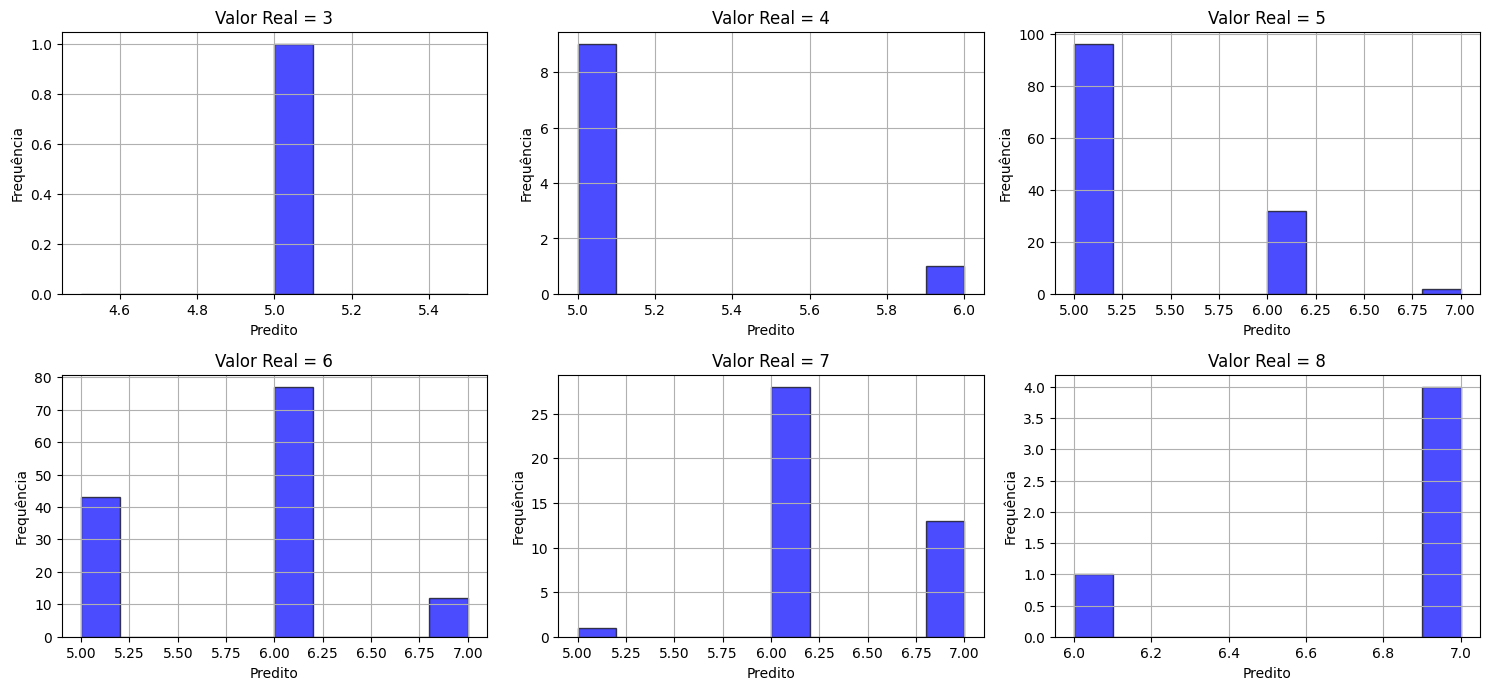

In [ ]:

plt.figure(figsize=(15, 10))
# Loop para plotar um histograma para cada valor de 3 a 9
for i, value in enumerate(values_range):
    # Filtrar os erros para o valor atual
    value_errors = errors[y_test == value]

    # Criar um subgráfico
    plt.subplot(3, 3, i+1)
    plt.hist(predictions[y_test == value], bins=10, alpha=0.7, edgecolor='black', color='blue')
    plt.title(f'Valor Real = {value}')
    plt.xlabel('Predito')
    plt.ylabel('Frequência')
    plt.grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## Pergunta:


*   Para quais classificações o modelo acertou e errou mais?




#Exercício

##Usando Redes Mais Complexas

Refaça a implementação anterior usando modelos com redes maiores para melhorar os resultados observados!

Dicas:

*   Siga o passo a passo indicado no tempate, use o exemplo anterior como referência de sintaxe.


*   Use e modifique o LargeModel do exemplo abaixo! Experimente adicionar mais camadas, aumentar o numero de neurons por camada, ou trocar a função de ativação!

*   Modelos maiores geralmente precisam treinar por mais tempo, experimente aumentar o numero de iterações de treino.

In [ ]:
##Modelo Maior
class LargeNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Saída única para regressão

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



##Template

In [ ]:
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


######### Passo 1: Carrege os dados da tabela #############

# Carregar o dataset com o separador correto
file_path = 'winequality-red.csv'
data = pd.read_csv(file_path, sep=';')
print(data.head())

# Definir características (X) e alvo (y)
X = data.drop(columns=['quality']).values
y = data['quality'].values

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converter em tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Formato adequado para MSE
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


######### Passo 2: Defina o modelo #############

# Definir uma rede neural simples
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        ##Definir cada uma das camadas

    def forward(self, x):
        ## Definir foward pass
        return x



######### Passo 3: Treine o modelo #############

# Inicializar o modelo
input_size = X_train.shape[1]
model = NN(input_size)

# Definir função de perda e otimizador


## Treinar o modelo
##Dica comece fazendo apenas uma iteração de treino depois ponha em um loop

  ###Loop de treino
  ### Use a rede para prever valores para o conjunto de treino
  ### Compare essa previsao com o y_train_tensor (valor verdadeiro)
      ###Dica: Aqui voce pode usar uma expressão, como no exemplo ou usar essas funções prontas  nn.CrossEntropyLoss(),nn.MAELoss(),nn.L1Loss()   Alternativamente em vez de chamar criteion posso simplesmente chamar uma expressão de y_test e predicicao
      ### no caso a sintaxe é loss=nn.MAELoss(y_test_tensor,predicao)

  ### Use zerograd e backward para calcular o gradient
  ### Use o otimizador para atualizar o parametro


##Use o modelo Treinado para Validaçao


with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    test_loss = criterion(predictions, y_test_tensor.squeeze())

    print(f"Perda no Conjunto de Teste: {test_loss.item():.4f}")


### Visualize os resultados do modelo
    ###Dica: use os histogramas para comparar efitavamente a perfomance do seu modelo com o do exemplo


## Pergunta:


*   Qual foi o efeito de aumentar a complexidade do modelo na acurácia final e no tempo de treino?

*   Se testou alguma função perda diferente, qual foi o efeito?


## Extra
  Use a outra tabela winequality-white.csv para repetir o processo com o vinhos brancos. Em qual cenário o modelo é mais correto?
  

*   Voce pode modularizar (transformar em funções) todo o processo, parametrizando o dataset alvo. Assim pode chamar uma vez o processo para cada tabela e comparar os resultados.



